In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

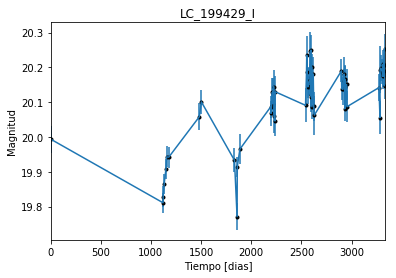

In [2]:
data = np.genfromtxt('LC_199429_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_199429_I')
plt.savefig("LC_199429_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

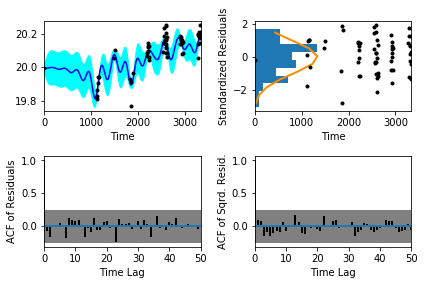

In [5]:
sample.assess_fit()

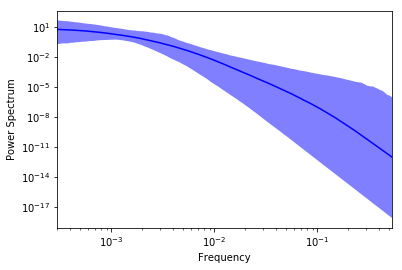

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

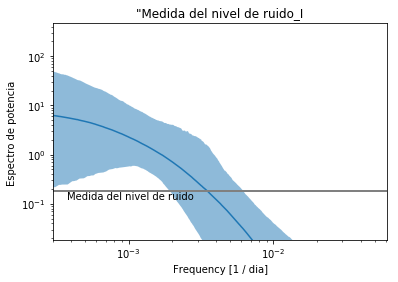

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_199429_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_199429_I')

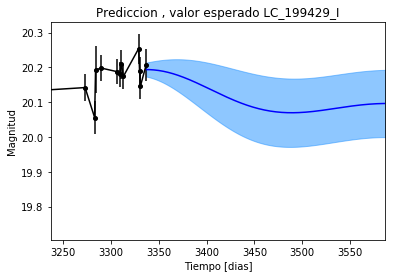

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_199429_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_199429_I')

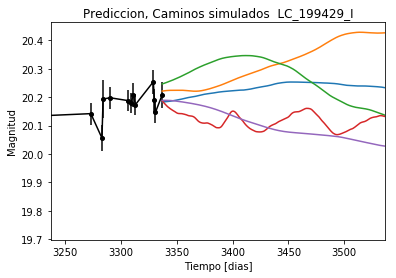

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_199429_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


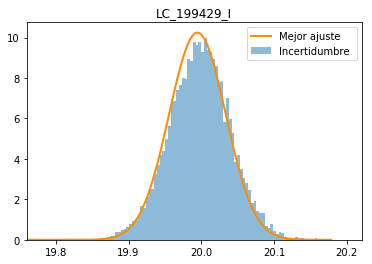

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_199429_I')
plt.savefig("Mejor_ajuste_LC_199429_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_199429_I')

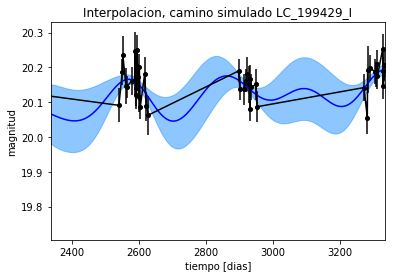

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_199429_I')

Text(0.5,1,'Interpolacion, camino simulado LC_199429_I')

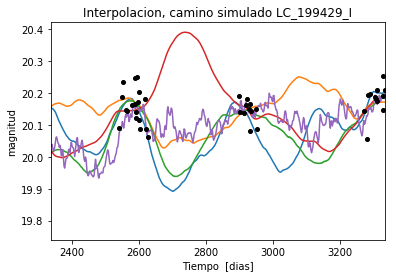

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_199429_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1019.95536012
Median: 0.00884645653694
Standard deviation: 0.20044203902
68% credibility interval: [ 0.00079712  0.17242223]
95% credibility interval: [  3.47769428e-04   8.12416431e-01]
99% credibility interval: [  3.08183898e-04   9.91946023e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1074.55412729
Median: 0.00211580770909
Standard deviation: 0.0737245713325
68% credibility interval: [ 0.00049991  0.02377979]
95% credibility interval: [ 0.00032993  0.21657571]
99% credibility interval: [  3.02465116e-04   5.36739263e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 590.50500943
Median: 0.013033236324
Standard de

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1490.91523428
Median: 119.799947351
Standard deviation: 1.57656340103
68% credibility interval: [ 118.06158957  120.91105092]
95% credibility interval: [ 115.52805439  121.49378074]
99% credibility interval: [ 113.57582058  121.710122  ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 373.820059841
Median: 0.508201927132
Standard deviation: 2.12488024925
68% credibility interval: [ 0.0515251   3.59883359]
95% credibility interval: [ 0.01524016  7.00929965]
99% credibility interval: [  0.01021644  10.09331803]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 815.742360637
Median: 0.284866450036
Standard deviation: 8.8035114121
68% credibility interval: [ 0.00702254  6.28060332]
95% credibility interval: [  6.50345952e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 47834.0922255
Median: 4.36722989497e-17
Standard deviation: 3.62663707992e+83
68% credibility interval: [  1.31396238e-50   5.78926533e-02]
95% credibility interval: [  2.88067949e-101   1.69881742e+045]
99% credibility interval: [  8.50497864e-105   1.93043064e+053]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3842.76487095
Median: 20.0459360768
Standard deviation: 0.0680801142517
68% credibility interval: [ 19.98855326  20.09633218]
95% credibility interval: [ 19.89948555  20.16577159]
99% credibility interval: [ 19.80411767  20.26471707]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 244.474844583
Median: 0.00425257767626
Standard deviation: 0.237499856201
68% credibility interval: [ 0.          0.30517992]
95% credibility interval: [ 0.         0.9152726]
99% credibility interval: [ 0.          1.02938313]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 244.474844583
Median: 0.00425257767626
Standard deviation: 0.237499856201
68% credibility interval: [ 0.          0.30517992]
95% credibility interval: [ 0.         0.9152726]
99% credibility interval: [ 0.          1.02938313]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 728.63715398
Median: 0.0
Standard deviation: 0.000771199033594
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1490.91523428
Median: 119.799947351
Standard deviation: 1.57656340103
68% credibility interval: [ 118.06158957  120.91105092]
95% credibility interval: [ 115.52805439  121.49378074]
99% credibility interval: [ 113.57582058  121.710122  ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2524.47768169
Median: 0.0162842437054
Standard deviation: 0.0276716474209
68% credibility interval: [ 0.00961692  0.03181759]
95% credibility interval: [ 0.00640069  0.07510732]
99% credibility interval: [ 0.00503159  0.17421177]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2592.9465495
Median: 1.10719646621
Standard deviation: 0.163083347073
68% credibility interval: [ 0.96037717  1.27088519]
95% credibility interval: [ 0.83986854  1.47786284]
99% credibility interval: [ 0.75523344  1.63666694]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2626.76848333
Median: 7.05486504882e-05
Standard deviation: 0.0761192762346
68% credibility interval: [  3.64020199e-07   3.70624862e-03]
95% credibility interval: [  5.92418398e-51   7.30004432e-02]
99% credibility interval: [  2.51000805e-59   4.67350439e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1019.95536012
Median: (-0.0555839257335+0j)
Standard deviation: 1.95267806232
68% credibility interval: [-1.08336084-3.3322909j  -0.00500843-0.06072233j]
95% credibility interval: [ -5.10456298e+00+0.j          -2.18509976e-03-5.84647164j]
99% credibility interval: [ -6.23258068e+00+0.j          -1.93637654e-03-0.01276996j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1074.55412729
Median: (-0.0132940119105+2.39870511141j)
Standard deviation: 1.56249938557
68% credibility interval: [-0.14941285+0.0257301j  -0.00314101+0.32867417j]
95% credibility interval: [-1.36078532+5.64725058j -0.00207299+0.j        ]
99% credibility interval: [ -3.37243225e+00+3.85407986j  -1.90044437e-03+0.j        ]
Posterior summary for para